Link to Hackathon -- https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge

Notebook by -- Success

## ZIMNAT INSURANCE RECOMMENDATION

Zimnat has been a leading player in the Zimbabwean life assurance and short-term insurance industries since 1946. For over 70 years, Zimnat has been protecting the assets of Zimbabweans, managing their wealth and ensuring that their assets and funds are passed onto future generations, should that be their wish.

For insurance markets to work well, insurance companies need to be able to pool and spread risk across a broad customer base. This works best where the population to be insured is diverse and large. In Africa, formal insurance against risk has been hampered by lack of private sector companies offering insurance, with no way to diversify and pool risk across populations.

Understanding the varied insurance needs of a population, and matching them to appropriate products offered by insurance companies, makes insurance more effective and makes insurance companies more successful.


In this notebook, I will carry out an exploratory data analysis of the Zimnat Insurance Company data.

The steps include:
#### *Getting the data*
   
#### *Loading The data*
    
#### *Understanding the data*
    
#### *Cleaning the data*: This is to remove messy data or fill missing values
        
#### *Visualizing the data*: This helps us to see the relationship between the features/columns
        
        
The end goal of this analysis is to make the data ready for prediction. 

This prediction help the company hnow whic kinds of insurance products to recommend to customers.

In [1]:
# importing python libraries      

import pandas as pd                  # for data manipulation

import numpy as np                   # for mathematical calculations

import seaborn as sns                # for data visualization

import matplotlib.pyplot as plt      # for plotting graphs

%matplotlib inline                   
# "%matplotlib inline" ensures commands in cells below the cell that outputs a plot does not affect the plot
    
import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [2]:
# Loading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Previewing the train data
# .head() returns the first 5 rows in the dataframe

train.head()

# Alternatively, you can use 'train.sample(5)'' to get the same output

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [4]:
# Previewing the test data
# .head() returns the first 5 rows in the dataframe

test.head()

# Alternatively, you can use 'test.sample(5)'' to get the same output

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,0,0,...,0,0,0,0,0,0,0,0,0,0
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
train.shape              # returns the no. of rows and columns


(29132, 29)

The output shows that there are 29132 rows and 29 columns in the train data

In [6]:
# This is used to view basic statistical details like percentile, mean, std etc.

train.describe(include='all')

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
count,29132,29130,29132,29132,29132.000000,29132,29132,29132,29132.000000,29132.000000,...,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000
unique,29132,132,2,8,NaN,15,233,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,JH6AZ1X,1/5/2018,M,M,NaN,748L,2A7I,T4MS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1319,20329,22913,NaN,8136,7089,18619,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1979.517060,NaN,NaN,NaN,0.001373,0.061101,...,0.018502,0.011122,0.003776,0.742448,0.234553,0.010676,0.048915,0.048675,0.030963,0.037828
std,NaN,NaN,NaN,NaN,9.325604,NaN,NaN,NaN,0.037030,0.239520,...,0.134760,0.104874,0.061333,0.437293,0.423726,0.102771,0.215695,0.215191,0.173219,0.190783
min,NaN,NaN,NaN,NaN,1932.000000,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1973.000000,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,1987.000000,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Data Cleaning

In [8]:
# The info() function is used to print a concise summary of a DataFrame

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

We see that after cleaning we have 29130 rows of clean data with no null values. 
There are 29 columns and two dtypes(int and object)

In [9]:
# Checking to see if any feature has empty/missing values

train.isnull().sum()

ID                          0
join_date                   2
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
GYSR                        0
SOP4                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
GHYX                        0
ECY3                        0
dtype: int64

The 'join_date' column has empty values in 2 rows. These rows will be dropped since they're too small to have a significant effect on the data set.

In [10]:
# Dropping the empty rows
# (inplace=True) argument means that changes made to the dataframe remains permanent.

train.dropna(subset= ['join_date'], inplace= True)
train.isnull().sum()

ID                          0
join_date                   0
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
GYSR                        0
SOP4                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
GHYX                        0
ECY3                        0
dtype: int64

The data is now clean and void of unnecessary features, we can now proceed to visualizing the data to see the relationship between features
## Data Visualization

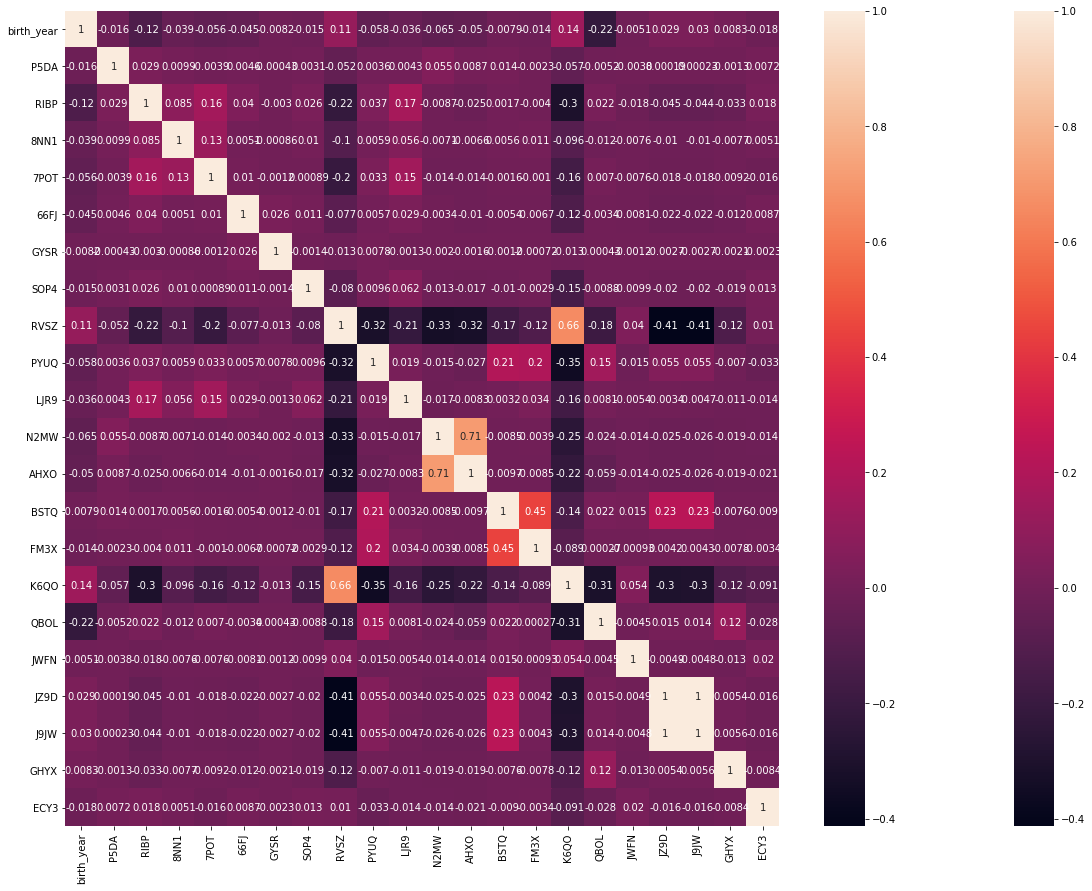

In [18]:
# First let's see the correlation between the features
# Checking the correlation of features helps us decide which features affect the target variable the most, and in turn, get used in predicting this target variable.
# Heatmaps are typically used to visualize correlation matrices.



plt.figure(figsize=(20, 15))             # This specifies the size, the bigger the map, the easier we can understand the map

sns.heatmap(train.corr())                # This is sufficient but adding the 'annot' argument makes interpretaton easier

sns.heatmap(train.corr(), annot = True)  # 'annot' helps display the correlation coefficient


plt.show()

The darker the box, the stronger/higher the correlation.

Some of the strongest relationship are those between RVSZ, JZ9D &J9JW.

Upon further visualization more insights can be gotten from this data,